In [3]:
import pandas as pd

# Load datasets (Raw string method)
real_news = pd.read_csv(r"C:\Users\nishika tendane\Downloads\main (1)\True.csv")
fake_news = pd.read_csv(r"C:\Users\nishika tendane\Downloads\main (1)\Fake.csv")

# Show first few rows
print("Real News:")
print(real_news.head())

print("\nFake News:")
print(fake_news.head())


Real News:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake News:
                                               title  \
0   Donald Trump Se

In [5]:
# Shape check (rows, columns)
print("Real News Shape:", real_news.shape)
print("Fake News Shape:", fake_news.shape)

# Missing values check
print("Missing values in Real News:\n", real_news.isnull().sum())
print("\nMissing values in Fake News:\n", fake_news.isnull().sum())


Real News Shape: (21417, 4)
Fake News Shape: (23481, 4)
Missing values in Real News:
 title      0
text       0
subject    0
date       0
dtype: int64

Missing values in Fake News:
 title      0
text       0
subject    0
date       0
dtype: int64


In [7]:
# Dataset ki total rows & columns count
print("Real News Shape:", real_news.shape)
print("Fake News Shape:", fake_news.shape)

# Column names check karo
print("\nColumns in Real News:", real_news.columns)
print("Columns in Fake News:", fake_news.columns)

# Data types check karo
print("\nData Types in Real News:\n", real_news.dtypes)
print("\nData Types in Fake News:\n", fake_news.dtypes)


Real News Shape: (21417, 4)
Fake News Shape: (23481, 4)

Columns in Real News: Index(['title', 'text', 'subject', 'date'], dtype='object')
Columns in Fake News: Index(['title', 'text', 'subject', 'date'], dtype='object')

Data Types in Real News:
 title      object
text       object
subject    object
date       object
dtype: object

Data Types in Fake News:
 title      object
text       object
subject    object
date       object
dtype: object


In [9]:
print("Missing values in Real News:\n", real_news.isnull().sum())
print("\nMissing values in Fake News:\n", fake_news.isnull().sum())


Missing values in Real News:
 title      0
text       0
subject    0
date       0
dtype: int64

Missing values in Fake News:
 title      0
text       0
subject    0
date       0
dtype: int64


In [11]:
print("Duplicate Rows in Real News:", real_news.duplicated().sum())
print("Duplicate Rows in Fake News:", fake_news.duplicated().sum())


Duplicate Rows in Real News: 206
Duplicate Rows in Fake News: 3


In [13]:
real_news = real_news.drop_duplicates()
fake_news = fake_news.drop_duplicates()


In [15]:
print("Duplicate Rows in Real News:", real_news.duplicated().sum())
print("Duplicate Rows in Fake News:", fake_news.duplicated().sum())


Duplicate Rows in Real News: 0
Duplicate Rows in Fake News: 0


In [ ]:
#Step 3: Data Merging & Labeling

In [17]:
# Fake news ka label = 0
fake_news["label"] = 0

# Real news ka label = 1
real_news["label"] = 1

# Dono datasets ko combine karna
df = pd.concat([real_news, fake_news], ignore_index=True)

# Final dataset ka shape check karo
print("Final Merged Dataset Shape:", df.shape)

# Label-wise distribution check karo
print(df['label'].value_counts())


Final Merged Dataset Shape: (44689, 5)
label
0    23478
1    21211
Name: count, dtype: int64


In [ ]:
# Data Cleaning & Preprocessing

In [19]:
#Unnecessary Columns Remove Karo
df = df[['title', 'text', 'label']]
print(df.head())  # Final cleaned dataset check karne ke liye



                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text  label  
0  WASHINGTON (Reuters) - The head of a conservat...      1  
1  WASHINGTON (Reuters) - Transgender people will...      1  
2  WASHINGTON (Reuters) - The special counsel inv...      1  
3  WASHINGTON (Reuters) - Trump campaign adviser ...      1  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      1  


In [ ]:
#Text Cleaning & Preprocessing

In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK downloads (First time run karna zaroori hai)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase conversion
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  
    return text

# Apply function to dataset
df["cleaned_text"] = df["text"].apply(clean_text)

# Cleaned text check karo
print(df[["text", "cleaned_text"]].head())


[nltk_data] Downloading package stopwords to C:\Users\nishika
[nltk_data]     tendane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\nishika
[nltk_data]     tendane\AppData\Roaming\nltk_data...


                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                        cleaned_text  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...  
3  washington reuters trump campaign adviser geor...  
4  seattlewashington reuters president donald tru...  


In [23]:
print(df[["text", "cleaned_text"]].head(5))  # Check first 5 rows


                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                        cleaned_text  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...  
3  washington reuters trump campaign adviser geor...  
4  seattlewashington reuters president donald tru...  


In [ ]:
#Data Visualization 📊

In [29]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.2 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.1 MB/s eta 0:00:00


In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


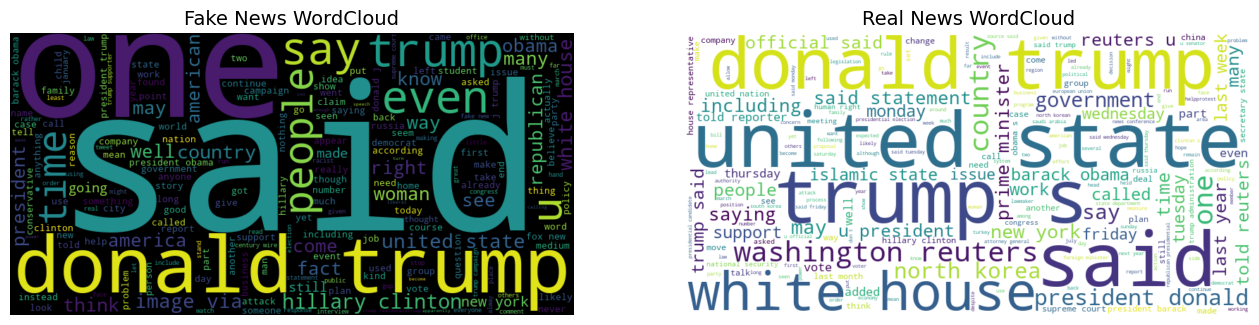

In [35]:
#Fake & Real News WordCloud Plot Karo
# Fake News WordCloud
fake_text = " ".join(df[df['label'] == 0]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

# Real News WordCloud
real_text = " ".join(df[df['label'] == 1]['cleaned_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Plot both word clouds
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.title("Fake News WordCloud", fontsize=14)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.title("Real News WordCloud", fontsize=14)
plt.axis("off")

plt.show()


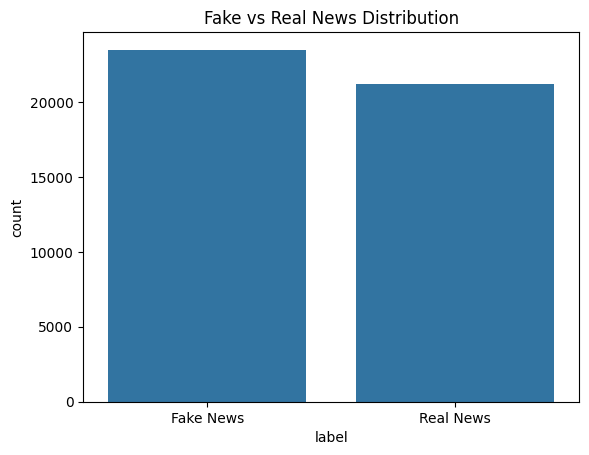

In [36]:
#Fake vs Real News Count Plot
import seaborn as sns

sns.countplot(x=df["label"])
plt.xticks([0, 1], ["Fake News", "Real News"])
plt.title("Fake vs Real News Distribution")
plt.show()


In [37]:
%matplotlib inline


In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Fake News WordCloud
fake_text = " ".join(df[df['label'] == 0]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

# Real News WordCloud
real_text = " ".join(df[df['label'] == 1]['cleaned_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Plot both word clouds
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.title("Fake News WordCloud", fontsize=14)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.title("Real News WordCloud", fontsize=14)
plt.axis("off")

**plt.show(block=True)**  # 👈 Forcefully show plot


SyntaxError: invalid syntax (422306850.py, line 25)

In [ ]:
import seaborn as sns

sns.countplot(x=df["label"])
plt.xticks([0, 1], ["Fake News", "Real News"])
plt.title("Fake vs Real News Distribution")

**plt.show(block=True)**  # 👈 Ensure plot is displayed


In [41]:
df.to_csv("cleaned_news_dataset.csv", index=False)


In [45]:
import pandas as pd
df = pd.read_csv("cleaned_news_dataset.csv")


In [ ]:
#Fix: Remove Extra Asterisks and Run Again

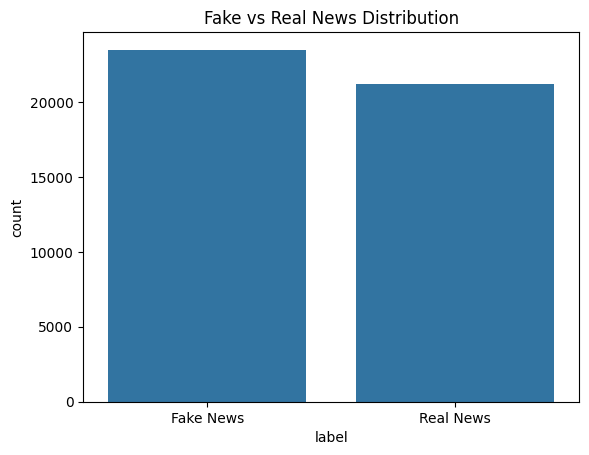

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fake vs Real News CountPlot
sns.countplot(x=df["label"])
plt.xticks([0, 1], ["Fake News", "Real News"])
plt.title("Fake vs Real News Distribution")

plt.show()  # ❌ "block=True" zaroori nahi hai, isko hata do


In [50]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


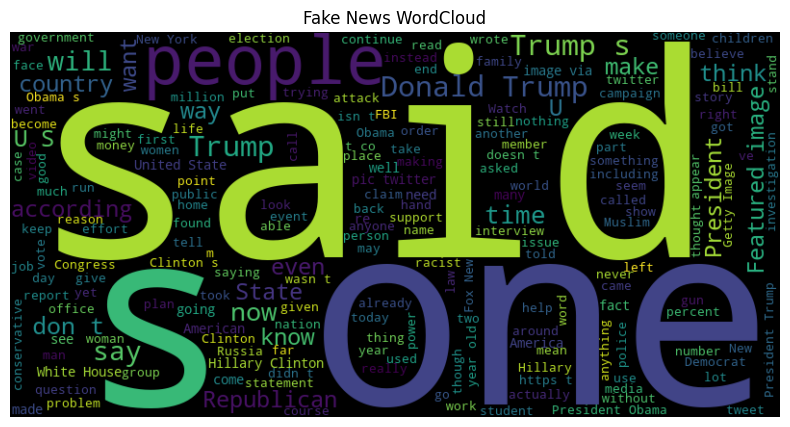

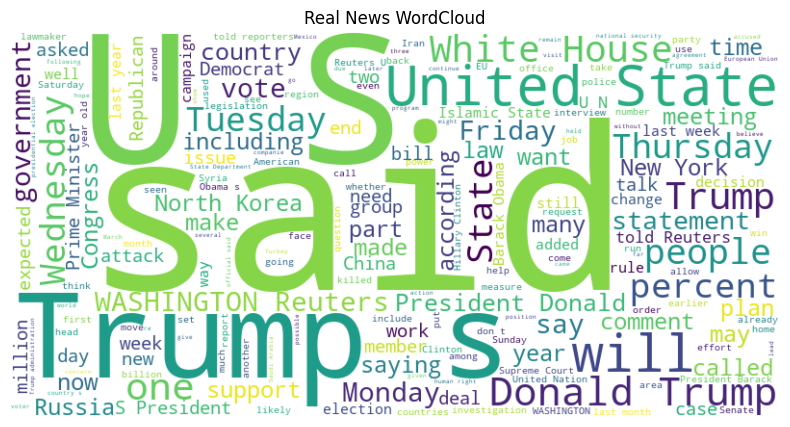

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fake News WordCloud
fake_text = " ".join(df[df["label"] == 0]["text"])  # Fake news ke text ko ek saath combine karna
wordcloud_fake = WordCloud(width=800, height=400, background_color="black").generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News WordCloud")
plt.show()

# Real News WordCloud
real_text = " ".join(df[df["label"] == 1]["text"])  # Real news ke text ko ek saath combine karna
wordcloud_real = WordCloud(width=800, height=400, background_color="white").generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Real News WordCloud")
plt.show()


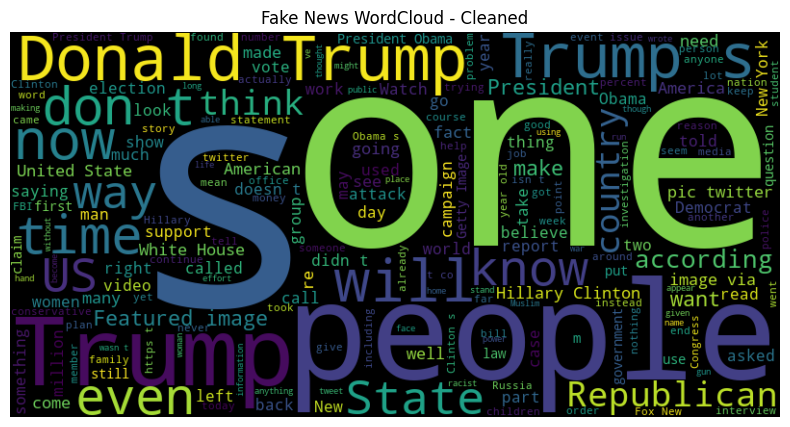

In [56]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
custom_stopwords = {"said", "say", "says", "u"}  # Extra words jo remove karna ho
stopwords.update(custom_stopwords)

wordcloud_fake = WordCloud(width=800, height=400, background_color="black", stopwords=stopwords).generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News WordCloud - Cleaned")
plt.show()


In [58]:
custom_stopwords = {"said", "say", "says", "u", "will", "may", "one", "new"}


In [60]:
#bacground color theme
wordcloud_fake = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(fake_text)


In [62]:
small_text = " ".join(fake_text.split()[:5000])  # Sirf pehle 5000 words
wordcloud_fake = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(small_text)


In [64]:
#Reduce Image Size 
wordcloud_fake = WordCloud(width=600, height=300, background_color="white", stopwords=stopwords).generate(fake_text)


In [65]:
#Reduce Interpolation Lag
plt.imshow(wordcloud_fake, interpolation="nearest")


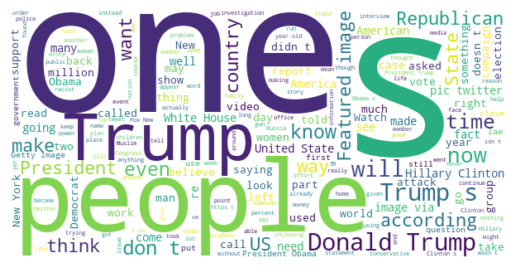

In [68]:
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.show()  # 👈 Ye add karna zaroori hai
